# Project 2

In [77]:
import math
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.transform as sktr
import skimage.io as io
import os
import scipy
import cv2
import glob
from skimage import data

## Part 1: Fun with Filters

### Part 1.1: Finite Difference Operator

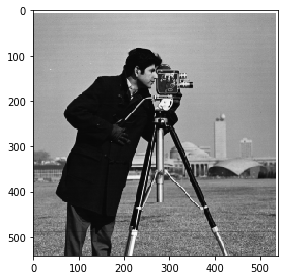

In [542]:
cameraman = cv2.imread('cameraman.png', 0)
io.imshow(cameraman)

In [543]:
dx = np.array([[1, -1]])
dy = dx.reshape(2, 1)

dx, dy

(array([[ 1, -1]]), array([[ 1],
        [-1]]))

In [544]:
cameraman_dx = scipy.signal.convolve2d(cameraman, dx)
cameraman_dy = scipy.signal.convolve2d(cameraman, dy)

/Users/ramimostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: camera/cameraman_dx.jpg is a low contrast image
  
Lossy conversion from int64 to uint8. Range [-255, 255]. Convert image to uint8 prior to saving to suppress this warning.


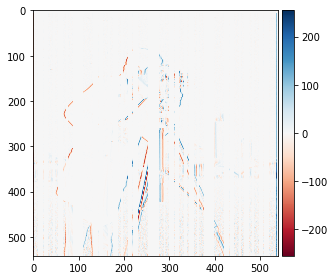

In [545]:
io.imshow(cameraman_dx)
io.imsave('camera/cameraman_dx1-1.jpg', cameraman_dx)

/Users/ramimostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: camera/cameraman_dy.jpg is a low contrast image
  
Lossy conversion from int64 to uint8. Range [-255, 255]. Convert image to uint8 prior to saving to suppress this warning.


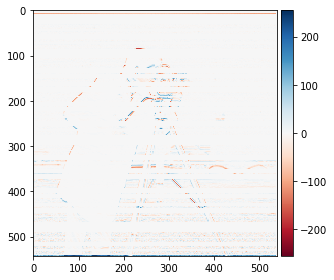

In [546]:
io.imshow(cameraman_dy)
io.imsave('camera/cameraman_dy1-1.jpg', cameraman_dy)

Lossy conversion from float64 to uint8. Range [0.0, 232.1077336066164]. Convert image to uint8 prior to saving to suppress this warning.
/Users/ramimostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: camera/binarized_gradient_magnitude.jpg is a low contrast image
  import sys
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


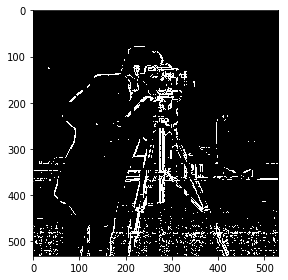

In [550]:
gradient = np.sqrt(cameraman_dx[5: -5, 5:-5] ** 2 + cameraman_dy[6:-5, 6:-3] ** 2)
io.imsave("camera/gradient1-1.jpg", gradient)

threshold = 30
binarized_gradient = gradient >= threshold
io.imshow(binarized_gradient);
io.imsave('camera/binarized_gradient_magnitude1-1.jpg', binarized_gradient.astype(int))

### Part 1.2: Derivative of Gaussian (DoG) Filter

/Users/ramimostafa/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


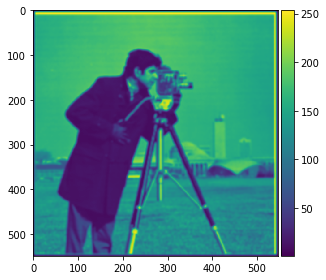

In [570]:
# Adjust blurriness
sigma = 2
size = 8
gauss_filter = np.outer(cv2.getGaussianKernel(size, sigma), cv2.getGaussianKernel(size, sigma).T)

blurred_image = scipy.signal.convolve2d(cameraman, gauss_filter)
io.imshow(blurred_image)

In [571]:
blurred_cameraman_dx = scipy.signal.convolve2d(blurred_image, dx)
blurred_cameraman_dy = scipy.signal.convolve2d(blurred_image, dy)

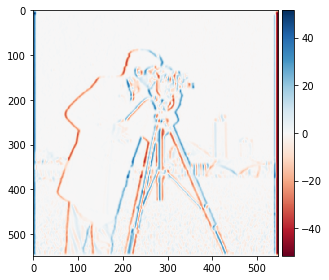

In [572]:
io.imshow(blurred_cameraman_dx)

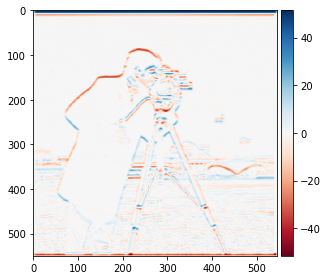

In [573]:
io.imshow(blurred_cameraman_dy)

/Users/ramimostafa/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


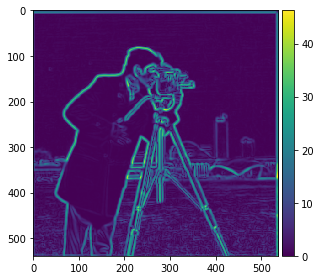

In [574]:
blurred_gradient = np.sqrt(blurred_cameraman_dx[5: -5, 5:-5] ** 2 + blurred_cameraman_dy[6:-5, 6:-3] ** 2)
io.imshow(blurred_gradient)

#### What difference do you see?

By blurring the images, the loss of details causes certain areas in the image such as the grass to be detected less in the partial derivatives. This is because the blurring causing the pixels to seemingly blend together, and because all of the grass has similar RGB values, the edges among the grass seem to disappear. However, much more explicit edges such as the edge between the person and the sky will require a lot more blurring to obscure. Therefore, we can still see these types of edges well represented in the gradient. As a result, we reduce the noise detected from part 1.1 and are able to more cleary see the significant edges in the image.

In [575]:
gauss_dx = scipy.signal.convolve2d(gauss_filter, dx)
gauss_dy = scipy.signal.convolve2d(gauss_filter, dy)

/Users/ramimostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: camera/gauss_dx1-2.jpg is a low contrast image
  
Lossy conversion from float64 to uint8. Range [-0.01251334602655899, 0.01251334602655899]. Convert image to uint8 prior to saving to suppress this warning.


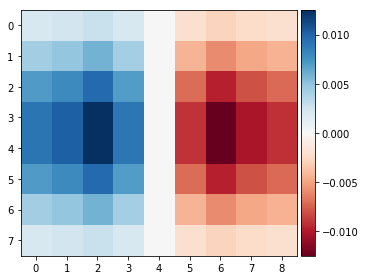

In [576]:
io.imshow(gauss_dx)
io.imsave('camera/gauss_dx1-2.jpg', gauss_dx)

/Users/ramimostafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: camera/gauss_dy1-2.jpg is a low contrast image
  
Lossy conversion from float64 to uint8. Range [-0.01251334602655899, 0.01251334602655899]. Convert image to uint8 prior to saving to suppress this warning.


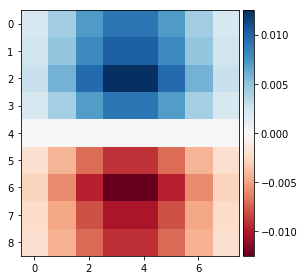

In [577]:
io.imshow(gauss_dy)
io.imsave('camera/gauss_dy1-2.jpg', gauss_dy)

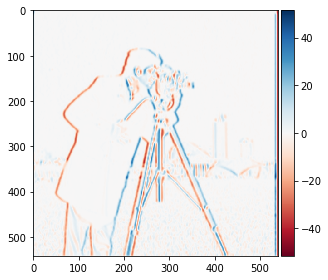

In [578]:
cg_dx = scipy.signal.convolve2d(cameraman, gauss_dx, mode='same')
io.imshow(cg_dx)

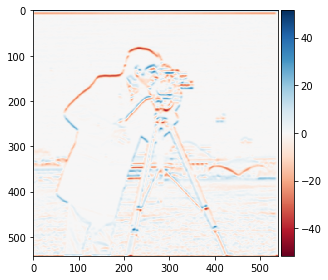

In [579]:
cg_dy = scipy.signal.convolve2d(cameraman, gauss_dy, mode='same')
io.imshow(cg_dy)

/Users/ramimostafa/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Lossy conversion from float64 to uint8. Range [9.922860898289234e-17, 52.490380651558226]. Convert image to uint8 prior to saving to suppress this warning.


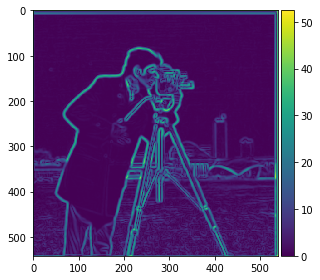

In [580]:
gauss_gradient = np.sqrt(cg_dx ** 2 + cg_dy ** 2)
io.imshow(gauss_gradient)
io.imsave('camera/gauss_gradient1-2.jpg', gauss_gradient)

### Part 1.3: Image Straightening

In [581]:
imagesToStraighten = glob.glob("straighten/*")
imagesToStraighten

['straighten/pisa.jpg', 'straighten/crooked.jpeg', 'straighten/facade.jpg']

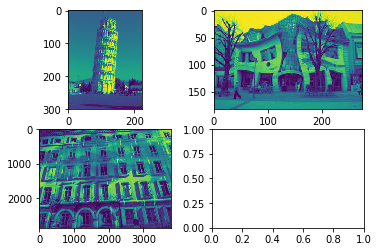

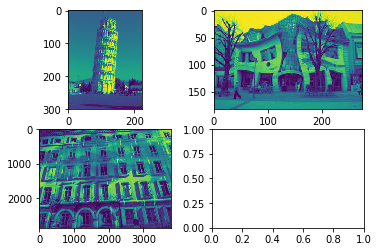

In [583]:
grayImages = [cv2.imread(x, 0) for x in imagesToStraighten]
io.imshow_collection(grayImages)

In [584]:
# Returns the number of cells in the gradient array that are within epsilon of horizontal or vertical angle 
def countLines(array, epsilon):
    validAngles = np.array([0, 90, 180, 270, 360])
    absArray = abs(array)
    booleanArray = np.zeros(array.shape)
    
    for a in validAngles:
        b1 = absArray <= (a + epsilon)
        b2 = absArray >= (a - epsilon)
        booleanArray = np.logical_or(booleanArray, np.logical_and(b1, b2))
        
    return sum(booleanArray.flatten())

In [585]:
def findBestAngles(image, angles, crop):
    gradient_angles = []
    scores = []
    for angle in angles:

        # Rotate the image by 'angle' degrees
        rotated = scipy.ndimage.interpolation.rotate(image, angle)

        # Convolve the rotated image with the partial derivative of the gaussian filter used in part 1.2
        gx = scipy.signal.convolve2d(rotated, gauss_dx, mode='same')
        gy = scipy.signal.convolve2d(rotated, gauss_dy, mode='same')

        # Ensure the partial derivative arrays are the same size
        gx = gx[:, :gy.shape[1]]
        gy = gy[:gx.shape[0], :]

        # Crop the partial derivative arrays to remove any black pixels generated by rotating the image
        xShape = gx.shape
        yShape = gy.shape
        gx = gx[xShape[0]//crop:-xShape[0]//crop, xShape[1]//crop:-xShape[1]//crop]
        gy = gy[yShape[0]//crop:-yShape[0]//crop, yShape[1]//crop:-yShape[1]//crop]

        # Compute the gradient angles by taking the arctan
        gAngles = np.arctan2(-gy, gx) * 180 / np.pi

        # Compute a score based upon how many edges are vertical or horizontal lines
        score = countLines(gAngles, 1) / np.sum(gAngles != 0)
        scores.append(score)
        gradient_angles.append(gAngles.flatten())

    # Find the angle with the highest score
    rotation_angle = angles[scores.index(max(scores))]
    return rotation_angle, gradient_angles

In [586]:
angles = np.arange(-10, 10)
crop = 5

best_angles = []
histograms = []
for i in range(len(grayImages)):
    print("Straightening image ", imagesToStraighten[i])
    scaled = skimage.transform.rescale(grayImages[i], 1 / 4)
    
    best, hist = findBestAngles(scaled, angles, crop)
    best_angles.append(best)
    histograms.append(hist)

Straightening image  straighten/pisa.jpg
Straightening image  straighten/crooked.jpeg
Straightening image  straighten/facade.jpg


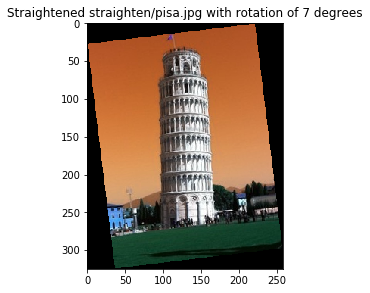

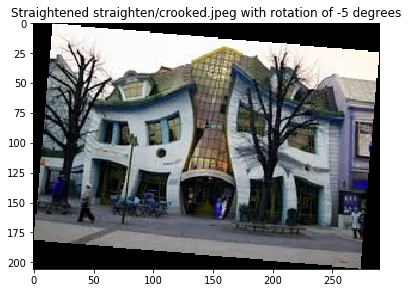

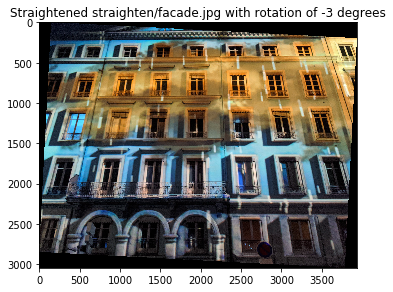

In [590]:
for i in range(len(imagesToStraighten)):
    straightImage = scipy.ndimage.interpolation.rotate(cv2.imread(imagesToStraighten[i]), best_angles[i])
    io.imshow(straightImage)
    io.imsave('straighten/results/' + imagesToStraighten[i].split(".")[0].split("/")[1] + '.jpg', straightImage)
    plt.title("Straightened " + imagesToStraighten[i] + " with rotation of " + str(best_angles[i]) + " degrees")
    plt.show();

Based upon the above pictures, the algorithm is able to properly straighten pictures that have clear straight lines that are meant to be vertical or horizontal. For images such as the second one where most edges are curved, the algorithm has a much harder time since it specifically uses straight edges to straighten the images.

Below we can plot the distribution of gradient angles for all of the attempted rotation angles on all of the images

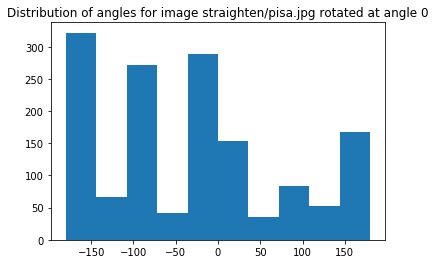

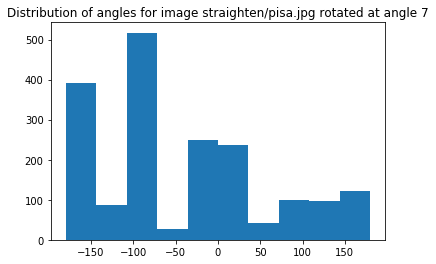

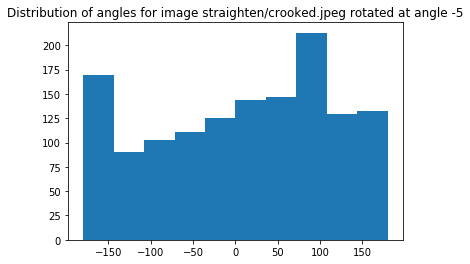

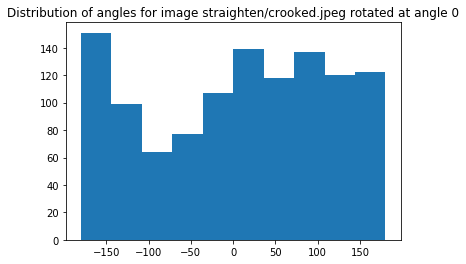

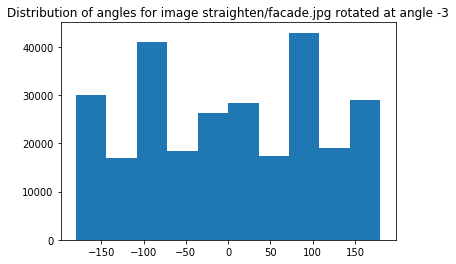

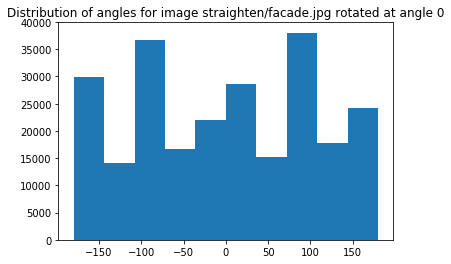

In [597]:
for i in range(len(histograms)):
    name = imagesToStraighten[i]
    for j in range(len(histograms[i])):
        if (j == 10):
            plt.hist(histograms[i][j])
            plt.title("Distribution of angles for image " + name + " rotated at angle 0")
            plt.savefig('straighten/results/' + imagesToStraighten[i].split(".")[0].split("/")[1] + '_histogram0.jpg')
            plt.show()
        if (j == best_angles[i] + 10):
            plt.hist(histograms[i][j])
            plt.title("Distribution of angles for image " + name + " rotated at angle " + str(angles[j]))
            plt.savefig('straighten/results/' + imagesToStraighten[i].split(".")[0].split("/")[1] + '_histogramRotated.jpg')
            plt.show()

Here we can plot the distribution of gradient angles for the original and straightened images

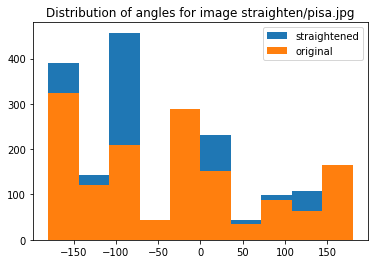

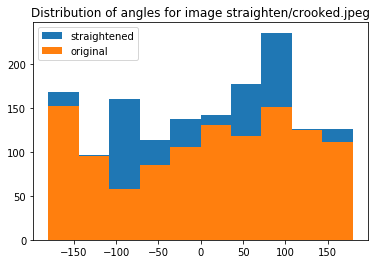

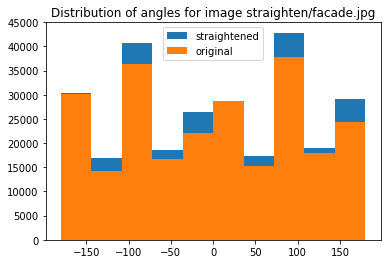

In [650]:
for i in range(len(histograms)):
    name = imagesToStraighten[i]
    index = np.where(angles == best_angles[i])[0][0]
    index0 = np.where(angles == 0)[0][0]
    plt.hist(histograms[i][index], label='straightened')
    plt.hist(histograms[i][index0], label='original')
    plt.title("Distribution of angles for image " + name)
    plt.legend()
    plt.show()

## Part 2: Fun with Frequencies!

### Part 2.1: Image "Sharpening"

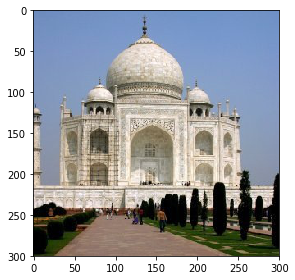

In [620]:
# original = skimage.color.rgb2gray(plt.imread('sharpen/taj.jpg'))
# io.imsave('sharpen/gray_taj.jpg', original)
original = plt.imread('sharpen/taj.jpg')
io.imshow(original)

In [621]:
sigma = 2
size = 4
gauss_filter = np.outer(cv2.getGaussianKernel(size, sigma), cv2.getGaussianKernel(size, sigma).T)

/Users/ramimostafa/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


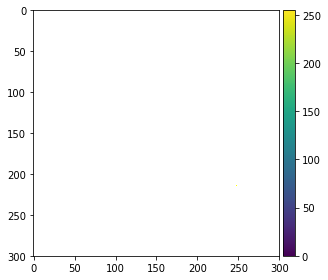

In [686]:
stack = []
for i in range(3):
    blurry = scipy.signal.convolve2d(original[:, :, i], gauss_filter, mode='same')
#     high = original[:, :, i] - blurry
#     comb = original[:, :, i] + high
#     print(comb)
#     normalImage = (255 * (comb - np.min(comb)) / np.ptp(comb)).astype(int)
#     print(normalImage)
    stack.append(blurry)

stack = np.stack(np.asarray(stack), axis=2)
colorSharp = original + (original - stack)
colorSharp += abs(colorSharp.min())
colorSharp /= colorSharp.max()
io.imshow((colorSharp * 255).astype(i)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


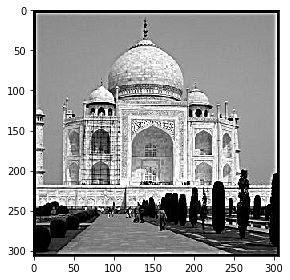

In [598]:
alpha = 1.5
e = scipy.signal.unit_impulse(gauss_filter.shape, 'mid')
sharpTaj = np.clip(scipy.signal.convolve2d(original, (1 + alpha) * e - alpha * gauss_filter), 0, 1)
io.imshow(sharpTaj)
io.imsave('sharpen/results/sharp_taj.jpg', sharpTaj)

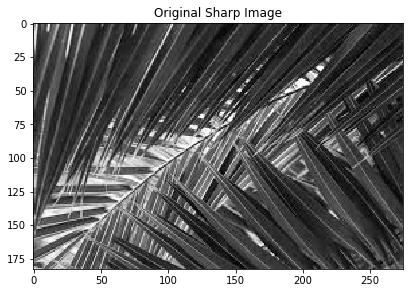

In [333]:
sharp = skimage.color.rgb2gray(plt.imread('sharpen/sharp.jpeg'))
io.imshow(sharp)
plt.title("Original Sharp Image");

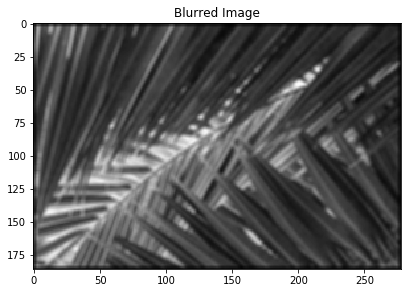

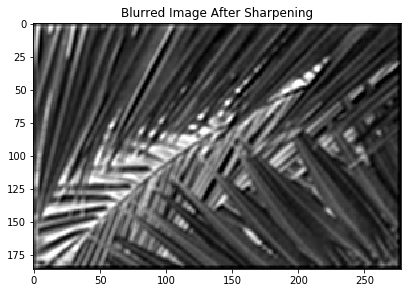

In [334]:
normal = scipy.signal.convolve2d(sharp, gauss_filter)
low_pass = scipy.signal.convolve2d(normal, gauss_filter)
high_pass = normal - low_pass[:normal.shape[0], :normal.shape[1]]

io.imshow(normal)
plt.title("Blurred Image")
plt.show()
io.imshow(np.clip(normal + high_pass, 0, 1))
plt.title("Blurred Image After Sharpening")
plt.show();

We can see above that blurring an image, and then attempting to resharpen it to obtain the original image is not always feasible. From the initial blurring of the image, a lot of details are lost that would be necessary in reconstructing the original image. Therefore, we may be able to sharpen the blurred image to an extent, but not enough to recover the originally sharp image.

### Part 2.2: Hybrid Images

In [437]:
from hybrid import align_image_code

In [449]:
%matplotlib qt
imagesToCombine = [['hybrid/nutmeg.jpg', 'hybrid/DerekPicture.jpg'], ['hybrid/hurt.jpg', 'hybrid/surprised.jpg'], ['hybrid/happy.jpg', 'hybrid/sad.jpg']]
sigmaValues = [12, 5, 6]
size = 40
results = []

for i in range(len(imagesToCombine)):
    first = imagesToCombine[i][0]
    second = imagesToCombine[i][1]
    sigma = sigmaValues[i]
    
    firstRaw = plt.imread(first)
    secondRaw = plt.imread(second)
    
    aligned_first, aligned_second = align_image_code.align_images(firstRaw, secondRaw)
    aligned_first = skimage.color.rgb2gray(aligned_first)
    aligned_second = skimage.color.rgb2gray(aligned_second)
    
    gauss_filter = np.outer(cv2.getGaussianKernel(size, sigma), cv2.getGaussianKernel(size, sigma).T)
    
    low = scipy.signal.convolve2d(aligned_second, gauss_filter, mode='same')
    high = aligned_first - scipy.signal.convolve2d(aligned_first, gauss_filter, mode='same')
    
    hybrid = np.clip((low + high) / 2, 0, 1)
    
    results.append(hybrid)
    io.imsave("hybrid/results/combined_image" + str(i) + ".jpg", hybrid)
plt.close()

Please select 2 points in each image for alignment.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Please select 2 points in each image for alignment.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Please select 2 points in each image for alignment.


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [450]:
%matplotlib qt
hurt = plt.imread('hybrid/hurt.jpg')
surprised = plt.imread('hybrid/surprised.jpg')

aligned_hurt, aligned_surprised = align_image_code.align_images(hurt, surprised)

Please select 2 points in each image for alignment.


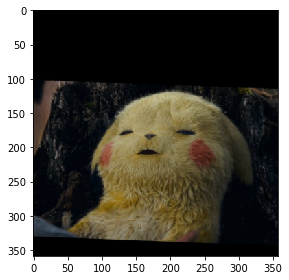

In [451]:
%matplotlib inline
io.imshow(aligned_hurt)

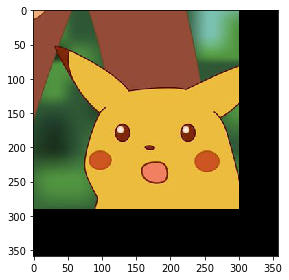

In [452]:
%matplotlib inline
io.imshow(aligned_surprised)

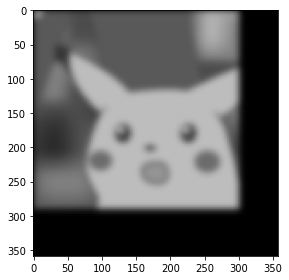

In [455]:
size = 40
sigma = 5
gauss_filter = np.outer(cv2.getGaussianKernel(size, sigma), cv2.getGaussianKernel(size, sigma).T)

aligned_surprised = skimage.color.rgb2gray(aligned_surprised)
low_pass = scipy.signal.convolve2d(aligned_surprised, gauss_filter, mode='same')
io.imshow(low_pass)

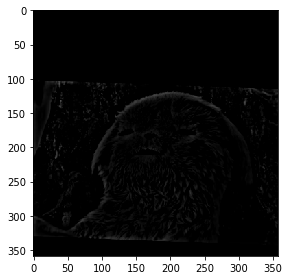

In [456]:
aligned_hurt = skimage.color.rgb2gray(aligned_hurt)
high_pass = aligned_hurt - scipy.signal.convolve2d(aligned_hurt, gauss_filter, mode='same')
io.imshow(np.clip(high_pass, 0, 1))

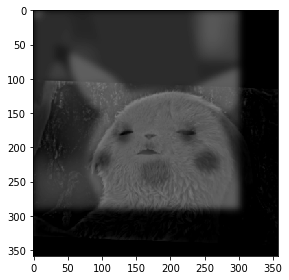

In [457]:
combined = np.clip((low_pass + high_pass) / 2, 0, 1)
io.imshow(combined)

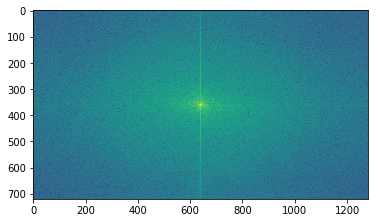

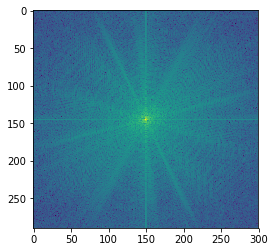

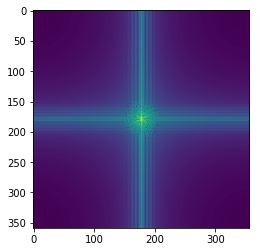

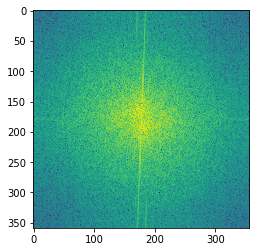

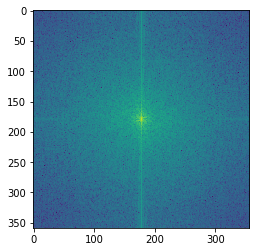

In [458]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(skimage.color.rgb2gray(hurt))))))
plt.show()

plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(skimage.color.rgb2gray(surprised))))))
plt.show()

plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(skimage.color.rgb2gray(low_pass))))))
plt.show()

plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(skimage.color.rgb2gray(high_pass))))))
plt.show()

plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(skimage.color.rgb2gray(combined))))))
plt.show()

## Part 2.3: Gaussian and Laplacian Stacks

In [419]:
def gaussStack(image, stackSize, sigma, kernelSize):
    result = [image]
    
    for i in range(stackSize):
        gauss = np.outer(cv2.getGaussianKernel(kernelSize, sigma), cv2.getGaussianKernel(kernelSize, sigma).T)
        result.append(scipy.signal.convolve2d(image, gauss, mode="same"))
        sigma *= 2
    
    return result

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(500, 390)


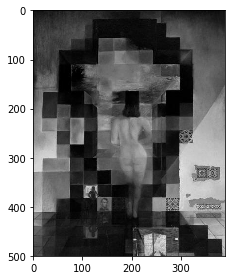

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(500, 390)


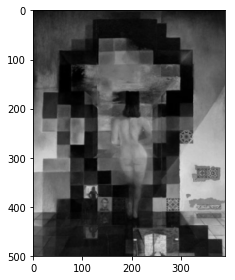

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(500, 390)


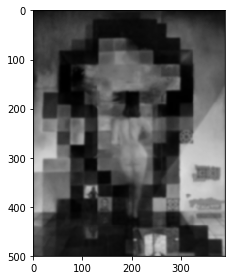

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(500, 390)


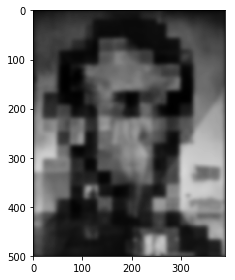

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(500, 390)


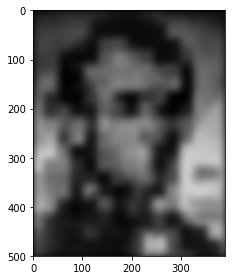

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(500, 390)


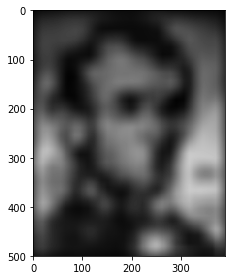

In [420]:
lincoln = skimage.color.rgb2gray(plt.imread('stack/lincoln.jpg'))
stackSize = 5
sigma = 1
kernelSize = 40

gauss_lincoln = gaussStack(lincoln, stackSize, sigma, kernelSize)
for i in range(len(gauss_lincoln)):
    io.imsave("stack/gauss_lincoln" + str(i) + ".jpg", gauss_lincoln[i])
    io.imshow(gauss_lincoln[i])
    plt.show()

In [422]:
def laplaceStack(gaussStack):
    return [gaussStack[i] - gaussStack[i + 1] for i in range(len(gaussStack) - 1)]

Lossy conversion from float64 to uint8. Range [-0.3669716013004438, 0.4275015450995101]. Convert image to uint8 prior to saving to suppress this warning.


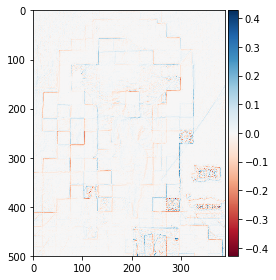

Lossy conversion from float64 to uint8. Range [-0.1480743333588671, 0.2309323496041995]. Convert image to uint8 prior to saving to suppress this warning.


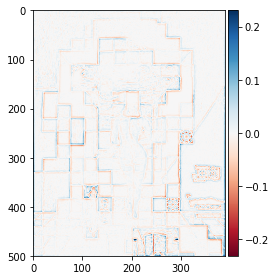

Lossy conversion from float64 to uint8. Range [-0.14448640650665415, 0.2353160778694512]. Convert image to uint8 prior to saving to suppress this warning.


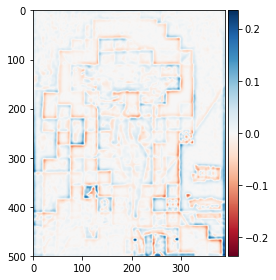

Lossy conversion from float64 to uint8. Range [-0.12729288548351353, 0.19939789276362713]. Convert image to uint8 prior to saving to suppress this warning.


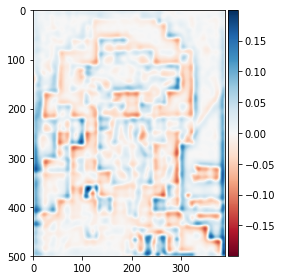

Lossy conversion from float64 to uint8. Range [-0.08093443156849492, 0.13179408149888738]. Convert image to uint8 prior to saving to suppress this warning.


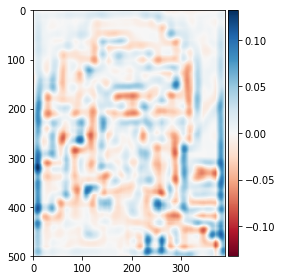

In [423]:
laplace_lincoln = laplaceStack(gauss_lincoln)

i = 0
for im in laplace_lincoln:
    io.imshow(im)
    io.imsave('stack/laplace_lincoln' + str(i) + ".jpg", im)
    plt.show()
    i += 1

## Part 2.4: Multiresolution Blending (a.k.a. the oraple!)

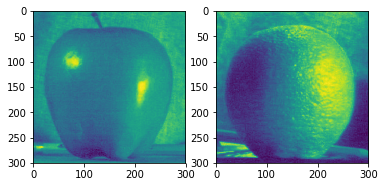

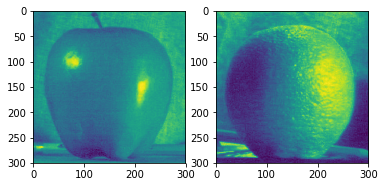

In [459]:
apple = skimage.color.rgb2gray(plt.imread('blend/apple.jpeg'))
orange = skimage.color.rgb2gray(plt.imread('blend/orange.jpeg'))

io.imshow_collection([apple, orange])

In [496]:
# This cell takes about half a minute to run

stackSize = 10
sigma = 3
kernelSize = 75

gauss_apple = gaussStack(apple, stackSize, sigma, kernelSize)
gauss_orange = gaussStack(orange, stackSize, sigma, kernelSize)

CPU times: user 28.3 s, sys: 82.2 ms, total: 28.4 s
Wall time: 28.4 s


In [498]:
laplace_apple = laplaceStack(gauss_apple)
laplace_orange = laplaceStack(gauss_orange)

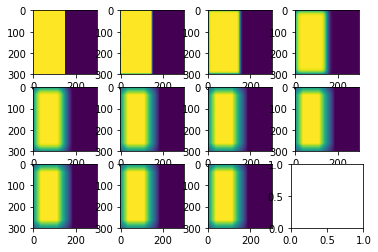

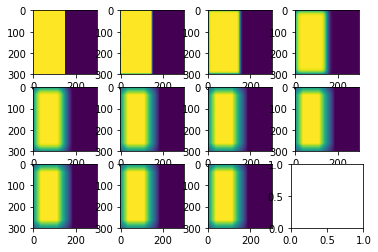

In [501]:
mask = np.zeros(apple.shape)
mask[:, :int(apple.shape[1] / 2)] = 1

gauss_mask = gaussStack(mask, stackSize, sigma, kernelSize)

Lossy conversion from float64 to uint8. Range [-0.19728311827581713, 0.679918899767379]. Convert image to uint8 prior to saving to suppress this warning.


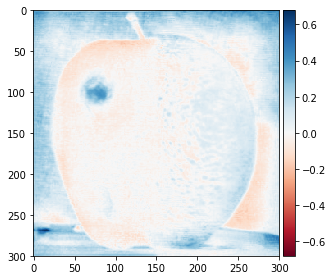

In [503]:
combined_stack = []
gauss_mask = gauss_mask[1:]

for i in range(len(gauss_mask)):
    combined_stack.append(gauss_mask[i] * laplace_apple[i] + (1 - gauss_mask[i]) * laplace_orange[i])

io.imshow(sum(combined_stack))
io.imsave('blend/results/orapple.jpg', sum(combined_stack))

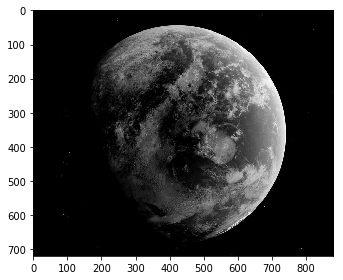

In [541]:
planet = skimage.color.rgb2gray(plt.imread('blend/planet.jpg'))
space = skimage.color.rgb2gray(plt.imread('blend/space.jpg'))
planet = planet[:, 200:-200]

xPlanet, yPlanet = planet.shape
xSpace, ySpace = space.shape

space = space[-xPlanet:, -yPlanet:]

io.imshow(planet)

In [523]:
# This cell takes about half a minute to run

stackSize = 10
sigma = 3
kernelSize = 50

gauss_planet = gaussStack(planet, stackSize, sigma, kernelSize)
gauss_space = gaussStack(space, stackSize, sigma, kernelSize)

In [524]:
laplace_planet = laplaceStack(gauss_planet)
laplace_space = laplaceStack(gauss_space)

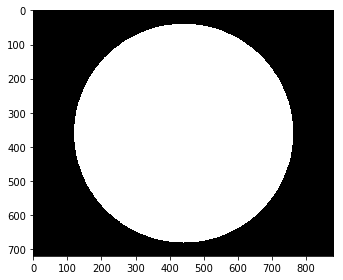

In [538]:
mask = np.zeros(planet.shape)

for i in range(len(mask)):
    for j in range(len(mask[0])):
        if ((360 - i) ** 2 + (440 - j) ** 2 <= (320 ** 2)):
            mask[i][j] = 1
    
io.imshow(mask)

In [539]:
gauss_mask = gaussStack(mask, stackSize, sigma, kernelSize)

Lossy conversion from float64 to uint8. Range [-0.5003564189060629, 0.9511358869317813]. Convert image to uint8 prior to saving to suppress this warning.


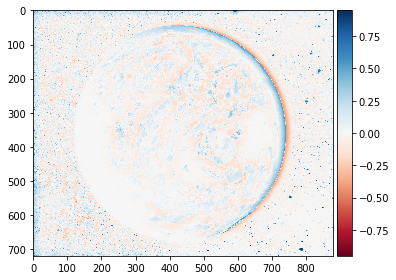

In [540]:
combined_stack = []
gauss_mask = gauss_mask[1:]

for i in range(len(gauss_mask)):
    combined_stack.append(gauss_mask[i] * laplace_planet[i] + (1 - gauss_mask[i]) * laplace_space[i])

io.imshow(sum(combined_stack))
io.imsave('blend/results/planet_space.jpg', sum(combined_stack))